In [27]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import scipy.optimize
from scipy.optimize import curve_fit


In [28]:
a = np.loadtxt('ASTR19_S22_group_project_data.txt', dtype='str')
i=0

datetemp=[]
timetemp=[]
time=[]
height=[]
date=[]

for arr in a: #fix this part
	datetemp.append(int(arr[0]))
	timetemp.append(arr[1])
	height.append(float(arr[2]))

for elem in timetemp:
	splitelem=elem.split(':')
	abstime = (int(splitelem[0])*60+int(splitelem[1]))
	time.append(abstime)


for elem in time:
	date.append(float(datetemp[i]+elem/1440))
	i+=1

#LOADS ALL DATA ^^^^ AND CREATES LISTS date[] AND height[] 

heighterr=0.25 #sets uncertainty error

[ 2.80802018 -3.87744824 10.18435558 10.94382711 -0.25694956 10.09782392
  2.47805946  6.78389963 12.51979951]
7519607.477162481


array([5.23284413e-02, 5.49133773e-02, 9.20424927e-06, 6.11990589e-03,
       1.38626930e-01, 1.79455597e-02, 3.39850974e-02, 1.07042473e+01,
       9.31905488e-03])

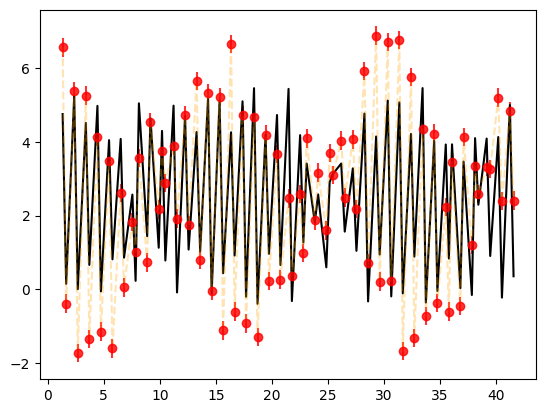

In [29]:
def fittedcurve(x,a,b,c,d,e,f,g,h,i):
    
    return a*np.sin(b*np.sin(c*x+d)+i) + e*np.sin(f*x+h)+g
    #return (a*np.cos(b*x))*(np.sin(d*x)) + (e*np.sin(f*x))+g
    #return np.sin(np.sin(a*x)*x+c)+np.sin(b*x)+d
#   return h*np.cos(a*x)*np.sin(b*x+c)+d*np.cos(e*x+f)+g
    # return b*np.cos(c*x+d)*e*np.sin(f*x+g)+h*np.sin(i*x+j)+k
   # return a*(b*(c*np.sin(d*np.cos(e*x+f)*x+g)+h*np.sin(i*x+j))+k)+l


date=np.array(date)
height=np.array(height)

params, cov = curve_fit(fittedcurve,date,height,maxfev=100000,p0=[9,-1,10,10,10,10,10,10,10],method='trf',bounds=(-100,400)) #fits curve to function fittedcurve()
fv=np.zeros(len(params)) #creates empty array fv[] (fitted values) where each element is the fitted value of a,b,c,d... respective to index
#plt.plot(date,fittedcurve(date,2.6,-1,1.4,22.65,1.12,2,1.95,4),alpha=0.2)
for i in range(len(params)):
    fv[i]=params[i]
print(fv)


fit = fittedcurve(date,*params) #*params unpacks the params[] list generated by curve_fit(), equivalent to: fv[0]*(fv[1]*np.sin(fv[2]*np.cos(fv[3]*x+fv[4])*x+fv[5])+fv[6]*np.sin(fv[7]*x+fv[8]))+fv[9]
plt.errorbar(date,height,yerr=heighterr,color='red',alpha=0.8,fmt='o')
plt.plot(date,fit,color='black')
plt.plot(date,height,color='orange',linestyle='dashed',alpha=0.3)


print(np.linalg.cond(cov))
np.diag(cov)

#create axes and figure instead of doing it this way, work on plot styling^^^


In [30]:
print(date[0:10])


[1.33819444 1.65069444 2.37152778 2.68402778 3.40625    3.71805556
 4.44097222 4.75       5.47777778 5.78194444]


Residual data 

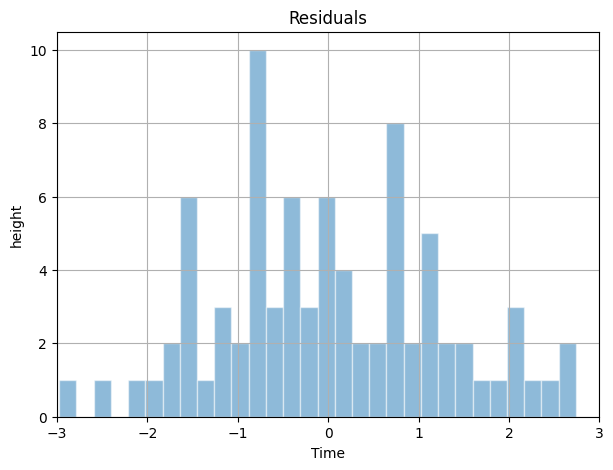

Standard Deviation of Residuals: 1.237449835699148


In [67]:
residuals = height - fit

f, ax=plt.subplots(1,1,figsize=(7,5))
ax.hist(residuals,bins=30,alpha=0.5,edgecolor="white")
ax.set_xlim(-3,3)
plt.title("Residuals")
plt.xlabel('Time')
plt.ylabel('height')
plt.grid(True)
plt.show()

residual_std = np.std(residuals)
print(f"Standard Deviation of Residuals: {residual_std}")